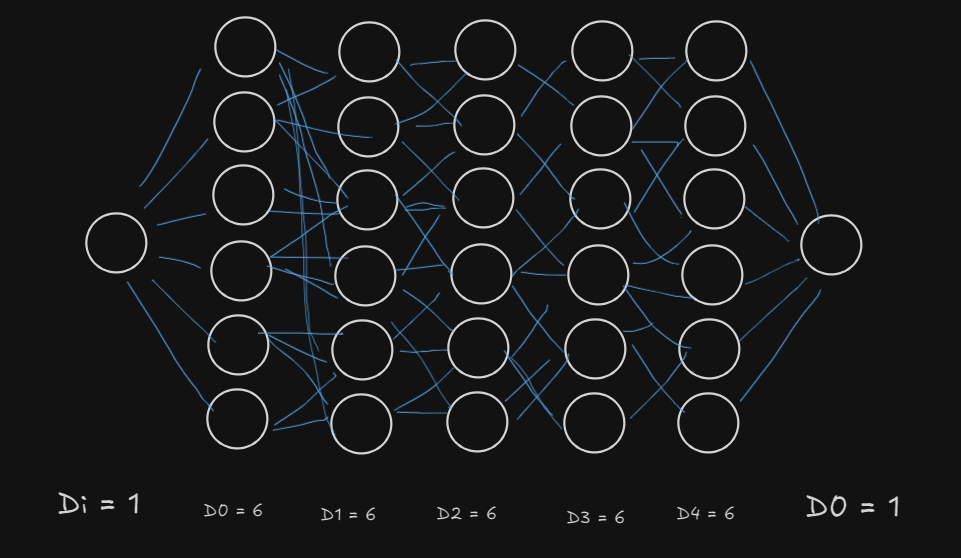

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

# number of hidden layers
K = 5

# number of neurons per layer
D = 6

# input layer
D_i = 1

# output layer
D_o = 1

In [3]:
all_weights = [None] * (K + 1)
all_biases = [None] * (K + 1)

all_weights

[None, None, None, None, None, None]

In [4]:
# weights for input layer
all_weights[0] = np.random.normal(size=(D, D_i))

# weights for output layer
all_weights[-1] = np.random.normal(size=(D_o, D))

all_biases[0] = np.random.normal(size=(D, 1))
all_biases[-1] = np.random.normal(size=(D_o, 1)) 

for layer in range(1, K):
  all_weights[layer] = np.random.normal(size=(D, D))
  all_biases[layer] = np.random.normal(size=(D, 1))

In [6]:
all_weights[3]

array([[ 0.96939671, -1.17312341,  1.94362119, -0.41361898, -0.74745481,
         1.92294203],
       [ 1.48051479,  1.86755896,  0.90604466, -0.86122569,  1.91006495,
        -0.26800337],
       [ 0.8024564 ,  0.94725197, -0.15501009,  0.61407937,  0.92220667,
         0.37642553],
       [-1.09940079,  0.29823817,  1.3263859 , -0.69456786, -0.14963454,
        -0.43515355],
       [ 1.84926373,  0.67229476,  0.40746184, -0.76991607,  0.53924919,
        -0.67433266],
       [ 0.03183056, -0.63584608,  0.67643329,  0.57659082, -0.20829876,
         0.39600671]])

In [7]:
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [22]:
def compute_network_output(net_input, all_weights, all_biases):
  
  K = len(all_weights) - 1
  
  all_f = [None] * (K + 1)
  all_h = [None] * (K + 1)
  
  all_h[0] = net_input
  
  for layer in range(K):
    all_f[layer] = all_biases[layer] + np.matmul(all_weights[layer], all_h[layer]) # (6, 1) + (6, 6) * (6, 1) = (6, 1)
    all_h[layer + 1] = ReLU(all_f[layer])
  
  all_f[K] = all_biases[K] + np.matmul(all_weights[K], all_h[K])
  
  net_output = all_f[K]

  return net_output, all_f, all_h
  

In [23]:
# Define input
net_input = np.ones((D_i,1)) * 1.2
# Compute network output
net_output, all_f, all_h = compute_network_output(net_input,all_weights, all_biases)
print("True output = %3.3f, Your answer = %3.3f"%(1.907, net_output[0,0]))

True output = 1.907, Your answer = 1.907


In [24]:
def least_squares_loss(net_output, y):
  return np.sum((net_output - y)**2)

def d_loss_d_output(net_output, y):
  return 2*(net_output - y)

In [25]:
y = np.ones((D_o,1)) * 20.0
loss = least_squares_loss(net_output, y)
print("y = %3.3f Loss = %3.3f"%(y, loss))

y = 20.000 Loss = 327.371


C:\Users\Admin\AppData\Local\Temp\ipykernel_13700\3361061389.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("y = %3.3f Loss = %3.3f"%(y, loss))


**1. Derivative with respect to Biases ($\beta_k$)**

The derivative of the loss $\ell_i$ with respect to the bias vector $\beta_k$ is simply the upstream derivative of the loss with respect to the pre-activation $f_k$:

$$\frac{\partial \ell_i}{\partial \beta_k} = \frac{\partial f_k}{\partial \beta_k} \frac{\partial \ell_i}{\partial f_k} = \frac{\partial}{\partial \beta_k} (\beta_k + \Omega_k h_k) \frac{\partial \ell_i}{\partial f_k} = \frac{\partial \ell_i}{\partial f_k}$$

**2. Derivative with respect to Weights ($\Omega_k$)**

The derivative of the loss $\ell_i$ with respect to the weight matrix $\Omega_k$ is the outer product of the upstream derivative $\frac{\partial \ell_i}{\partial f_k}$ and the transpose of the source activation $h_k$:

$$\frac{\partial \ell_i}{\partial \Omega_k} = \frac{\partial f_k}{\partial \Omega_k} \frac{\partial \ell_i}{\partial f_k} = \frac{\partial}{\partial \Omega_k} (\beta_k + \Omega_k h_k) \frac{\partial \ell_i}{\partial f_k} = \frac{\partial \ell_i}{\partial f_k} h_k^T$$

In [29]:
def indicator_fucntion(x):
  x_in = np.array(x)
  x_in[x_in > 0] = 1
  x_in[x_in <= 0] = 0
  return x_in

In [51]:
# Main backward pass routine
def backward_pass(all_weights, all_biases, all_f, all_h, y):
  # We'll store the derivatives dl_dweights and dl_dbiases in lists as well
  all_dl_dweights = [None] * (K+1)
  all_dl_dbiases = [None] * (K+1)
  # And we'll store the derivatives of the loss with respect to the activation and 
  # preactivations in lists
  all_dl_df = [None] * (K+1)
  all_dl_dh = [None] * (K+1)
  # Again for convenience we'll stick with the convention that all_h[0] is the net 
  # input and all_f[K] is the net output

  # Compute derivatives of the loss with respect to the network output
  all_dl_df[K] = np.array(d_loss_d_output(all_f[K],y))

  # Now work backwards through the network
  for layer in range(K,-1,-1):
    # TODO Calculate the derivatives of the loss with respect to the biases at layer 
    # this from all_dl_df[layer]. (eq 7.21)
    # NOTE!  To take a copy of matrix X, use Z=np.array(X)
    # REPLACE THIS LINE
    all_dl_dbiases[layer] = np.array(all_dl_df[layer])

    # TODO Calculate the derivatives of the loss with respect to the weights at layer 
    # from all_dl_df[layer] and all_h[layer] (eq 7.22)
    # Don't forget to use np.matmul
    # REPLACE THIS LINE
    all_dl_dweights[layer] = np.matmul(all_dl_df[layer],all_h[layer].transpose())

    # TODO: calculate the derivatives of the loss with respect to the activations from 
    # weight and derivatives of next preactivations (second part of last line of eq 7.24)
    # REPLACE THIS LINE
    all_dl_dh[layer] =  np.matmul(all_weights[layer].transpose(),all_dl_df[layer])


    if layer > 0:
      # TODO Calculate the derivatives of the loss with respect to the pre-activation 
      # f (use deriv of ReLu function, first part of last line of eq. 7.24)
      # REPLACE THIS LINE
      all_dl_df[layer-1] = indicator_fucntion(all_f[layer-1]) * all_dl_dh[layer]
        

  return all_dl_dweights, all_dl_dbiases

In [52]:
all_dl_dweights, all_dl_dbiases = backward_pass(all_weights, all_biases, all_f, all_h, y)

In [53]:
np.set_printoptions(precision=3)
# Make space for derivatives computed by finite differences
all_dl_dweights_fd = [None] * (K+1)
all_dl_dbiases_fd = [None] * (K+1)

# Let's test if we have the derivatives right using finite differences
delta_fd = 0.000001

In [54]:
# Test the dervatives of the bias vectors
for layer in range(K):
  dl_dbias  = np.zeros_like(all_dl_dbiases[layer])
  # For every element in the bias
  for row in range(all_biases[layer].shape[0]):
    # Take copy of biases  We'll change one element each time
    all_biases_copy = [np.array(x) for x in all_biases]
    all_biases_copy[layer][row] += delta_fd
    network_output_1, *_ = compute_network_output(net_input, all_weights, all_biases_copy)
    network_output_2, *_ = compute_network_output(net_input, all_weights, all_biases)
    dl_dbias[row] = (least_squares_loss(network_output_1, y) - least_squares_loss(network_output_2,y))/delta_fd
  all_dl_dbiases_fd[layer] = np.array(dl_dbias)
  print("Bias %d, derivatives from backprop:"%(layer))
  print(all_dl_dbiases[layer])
  print("Bias %d, derivatives from finite differences"%(layer))
  print(all_dl_dbiases_fd[layer])

Bias 0, derivatives from backprop:
[[ -4.486]
 [  4.947]
 [  6.812]
 [ -3.883]
 [-24.935]
 [  0.   ]]
Bias 0, derivatives from finite differences
[[ -4.486]
 [  4.947]
 [  6.812]
 [ -3.883]
 [-24.935]
 [  0.   ]]
Bias 1, derivatives from backprop:
[[ -0.   ]
 [-11.297]
 [  0.   ]
 [  0.   ]
 [-10.722]
 [  0.   ]]
Bias 1, derivatives from finite differences
[[  0.   ]
 [-11.297]
 [  0.   ]
 [  0.   ]
 [-10.722]
 [  0.   ]]
Bias 2, derivatives from backprop:
[[-0.   ]
 [-0.   ]
 [ 0.938]
 [ 0.   ]
 [-9.993]
 [ 0.508]]
Bias 2, derivatives from finite differences
[[ 0.   ]
 [ 0.   ]
 [ 0.938]
 [ 0.   ]
 [-9.993]
 [ 0.508]]
Bias 3, derivatives from backprop:
[[-0.   ]
 [-4.8  ]
 [-1.661]
 [-0.   ]
 [ 3.393]
 [ 5.391]]
Bias 3, derivatives from finite differences
[[ 0.   ]
 [-4.8  ]
 [-1.661]
 [ 0.   ]
 [ 3.393]
 [ 5.391]]
Bias 4, derivatives from backprop:
[[-0.   ]
 [ 0.   ]
 [ 0.   ]
 [-0.   ]
 [-5.212]
 [-0.   ]]
Bias 4, derivatives from finite differences
[[ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [

In [55]:
# Test the derivatives of the weights matrices
for layer in range(K):
  dl_dweight  = np.zeros_like(all_dl_dweights[layer])
  # For every element in the bias
  for row in range(all_weights[layer].shape[0]):
    for col in range(all_weights[layer].shape[1]):
      # Take copy of biases  We'll change one element each time
      all_weights_copy = [np.array(x) for x in all_weights]
      all_weights_copy[layer][row][col] += delta_fd
      network_output_1, *_ = compute_network_output(net_input, all_weights_copy, all_biases)
      network_output_2, *_ = compute_network_output(net_input, all_weights, all_biases)
      dl_dweight[row][col] = (least_squares_loss(network_output_1, y) - least_squares_loss(network_output_2,y))/delta_fd
  all_dl_dweights_fd[layer] = np.array(dl_dweight)
  print("Weight %d, derivatives from backprop:"%(layer))
  print(all_dl_dweights[layer])
  print("Weight %d, derivatives from finite differences"%(layer))
  print(all_dl_dweights_fd[layer])

Weight 0, derivatives from backprop:
[[ -5.383]
 [  5.937]
 [  8.174]
 [ -4.66 ]
 [-29.922]
 [  0.   ]]
Weight 0, derivatives from finite differences
[[ -5.383]
 [  5.937]
 [  8.174]
 [ -4.66 ]
 [-29.922]
 [  0.   ]]
Weight 1, derivatives from backprop:
[[  0.      0.      0.      0.      0.      0.   ]
 [-32.511  -6.799 -18.282 -34.148 -42.196   0.   ]
 [  0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.   ]
 [-30.856  -6.453 -17.352 -32.409 -40.047   0.   ]
 [  0.      0.      0.      0.      0.      0.   ]]
Weight 1, derivatives from finite differences
[[  0.      0.      0.      0.      0.      0.   ]
 [-32.511  -6.799 -18.282 -34.148 -42.196   0.   ]
 [  0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.   ]
 [-30.856  -6.453 -17.352 -32.409 -40.047   0.   ]
 [  0.      0.      0.      0.      0.      0.   ]]
Weight 2, derivatives from backprop:
[[  0.      0.      0.      0.      0.      0.   